In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warning messages
import warnings
warnings.filterwarnings('ignore')
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

In [3]:
df = pd.read_csv('./Trumps Legcy.csv')

In [4]:


df.head()



,id,text,device,favorites,retweets,date
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,8/2/2011 18:07
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,3/3/2020 1:34
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,1/17/2020 3:22
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,9/12/2020 20:10
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,1/17/2020 13:13


In [5]:
df["date"] = pd.to_datetime(df["date"])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

# No of Tweets yearwise

In [6]:
df.groupby("year").size().reset_index(name='counts')

,year,counts
0,2009,56
1,2010,142
2,2011,773
3,2012,3531
4,2013,8144
5,2014,5784
6,2015,7536
7,2016,4225
8,2017,2602
9,2018,3568


In [7]:
Category=df['hour'].value_counts().sort_index()
data = [go.Pie(
        labels = Category.index,
        values = Category.values,
        hoverinfo = 'label+value',
)]
plotly.offline.iplot(data, filename='active_category')

He is more active at mid of the day and end of the day which make sense

In [8]:
# Consider data from 2017
df_2017 = df[df.year>2017].copy();
df_2017.shape

(23778, 10)

<AxesSubplot:xlabel='favorites', ylabel='Density'>

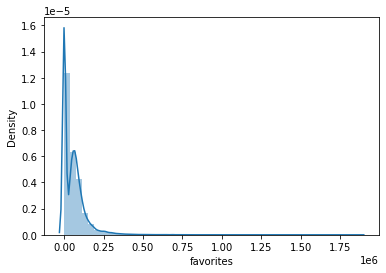

In [9]:
sns.distplot(df_2017['favorites'])

In [10]:
df_2017_favs = df_2017[df_2017.favorites > df_2017['favorites'].quantile([0.95]).values[0]].copy()

In [11]:
df_2017_favs.shape

(1189, 10)

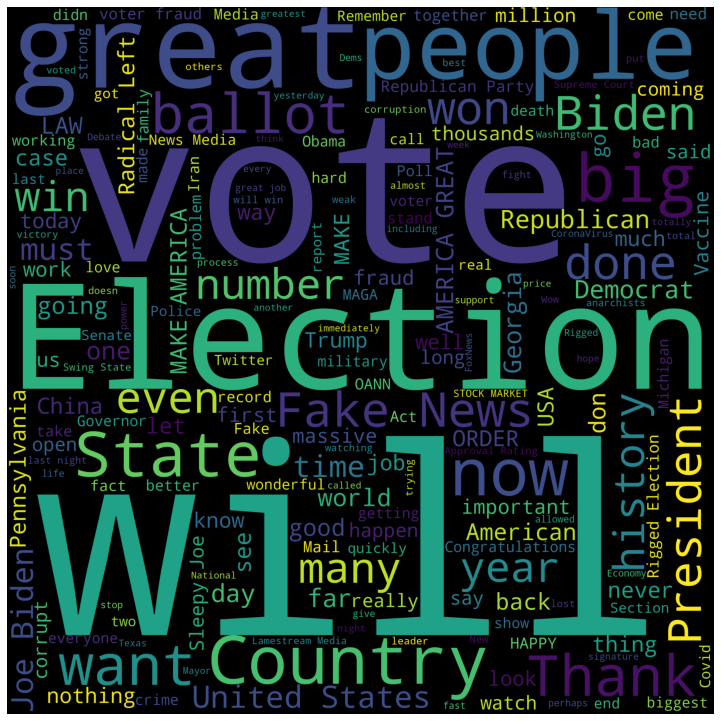

In [13]:
def showWordCloud(data):
    words = ' '.join(data)
    STOPWORDS.update(["https","t","co","u","s","rt", "amp"])    
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'black',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(df_2017_favs['text'])

In [14]:
df_2017_favs['just_date'] = df_2017_favs['date'].dt.strftime('%Y-%M-%d')

In [15]:
df_2017_favs.head()

,id,text,device,favorites,retweets,date,year,month,day,hour,just_date
6,1223640000000000000,Getting a little exercise this morning! https:...,Twitter for iPhone,285863,30209,2020-02-01 16:14:00,2020,2,1,16,2020-14-01
10,1319500000000000000,https://t.co/TQCQiDrVOB,Twitter for iPhone,255804,35594,2020-10-23 04:46:00,2020,10,23,4,2020-46-23
15,1319490000000000000,"As per your request, Joe... https://t.co/78mzc...",Twitter for iPhone,253761,79855,2020-10-23 04:09:00,2020,10,23,4,2020-09-23
19,1325880000000000000,The threshold identification of Ballots is tur...,Twitter for iPhone,493076,100609,2020-11-09 19:36:00,2020,11,9,19,2020-36-09
21,1319680000000000000,HUGE win today for the United States and for p...,Twitter for iPhone,215994,51830,2020-10-23 16:55:00,2020,10,23,16,2020-55-23


# Analysing Dow Jones Data from 2019

In [17]:
df_dow = pd.read_csv("./DJI-2017.csv")

In [19]:
df_dow['change%'] = (abs(df_dow['Close'] - df_dow['Open'])/df_dow['Open'])*100

In [20]:
print("maximum change in a day in dow jones", df_dow['change%'].max())
print("median change in a day in dow jones", df_dow['change%'].median())

maximum change in a day in dow jones 5.514738951802036
median change in a day in dow jones 0.35418620236202847


In [21]:
df_combined = df_dow.merge(df_2017_favs, left_on="Date", right_on="just_date")[['Date', 'text', 'change%', 'favorites']]

In [22]:
df_combined['change%'].describe()

count    124.000000
mean       0.889410
std        0.772513
min        0.002467
25%        0.285609
50%        0.692987
75%        1.202811
max        4.273221
Name: change%, dtype: float64

In [ ]:
df_dow['change%'].describe()